# Atividade - Ajuste de Dados

# Caio Vítor de S. Soares
# 08/04/2021

 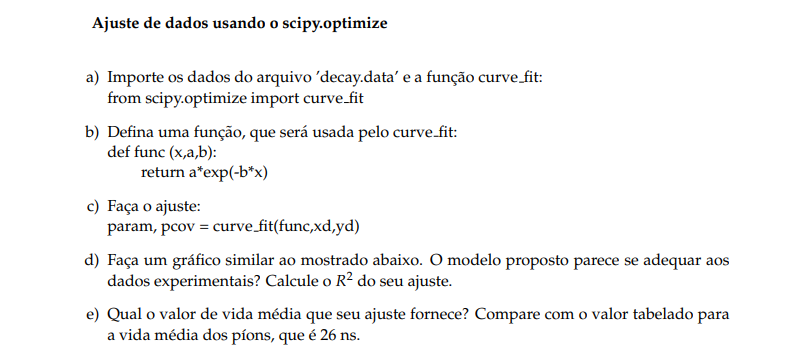

8.916666666666666
[32. 17. 21.  7.  8.  6.  5.  2.  3.  1.  4.  1.]
83.24367186275919 1004.9166666666669


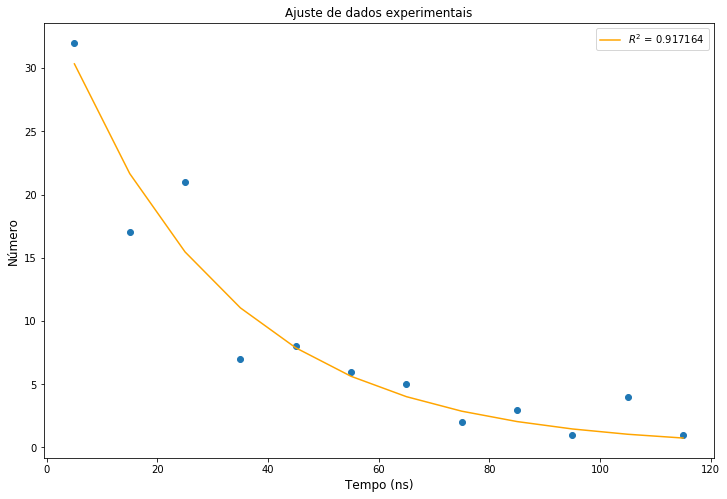

In [57]:
from numpy import loadtxt,exp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

dados = loadtxt("decay.data",float)
xd = dados[:,0]
yd = dados[:,1]
def func(x,a,b):
    return a*exp(-b*x)

N = len(yd)

param,pcov = curve_fit(func,xd,yd)
ydm = sum(yd)/(N)
print(ydm)
print(yd)
s1,s2 = 0,0
for i in range(N):
    s1 += (yd[i]-func(xd[i],param[0],param[1]))**2
    s2 += (yd[i] - ydm)**2 
       
R2 =  1 - (s1/s2)
print(s1,s2)
y = func(xd,param[0],param[1])

plt.fig = plt.figure(figsize = (12,8))
plt.title("Ajuste de dados experimentais",fontsize = 12)
plt.scatter(xd,yd)
plt.plot(xd,y,c='orange',label = "$R^2$ = %f"%R2)
plt.ylabel("Número",fontsize = 12)
plt.xlabel("Tempo (ns)",fontsize = 12)
plt.legend()

Podemos calcular o tempo de vida média pelo teorema do valor médio da integral:
    \begin{equation}
    \langle I \rangle = \frac{1}{b-a} \int_a^b{f(x)dx}
    \end{equation}
    

In [58]:
#vamos calcular a integral pela regra do trapezio:
def trapezio (N,a,b):
    soma=0
    H = (b-a)/N
    
    soma = (func(a,param[0],param[1])+func(b,param[0],param[1]))/2 
    for j in range(1,N):
        soma += func(a + j*H,param[0],param[1])
    I = H*soma
    return I

valormedio = -trapezio(100,xd[0],xd[1])/(xd[0]-xd[1])
print(valormedio)

25.749715947213804


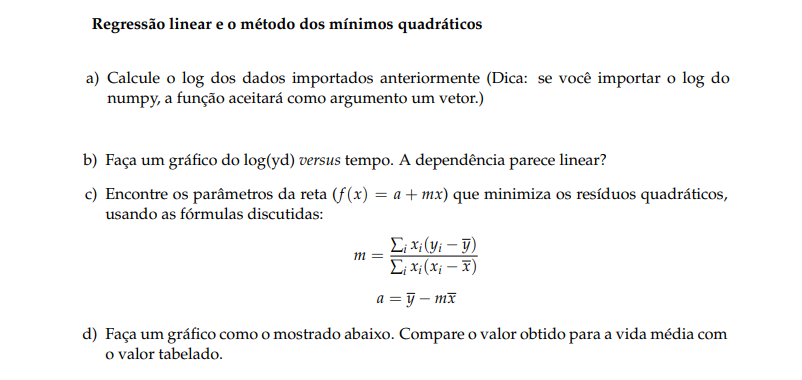

[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115.]


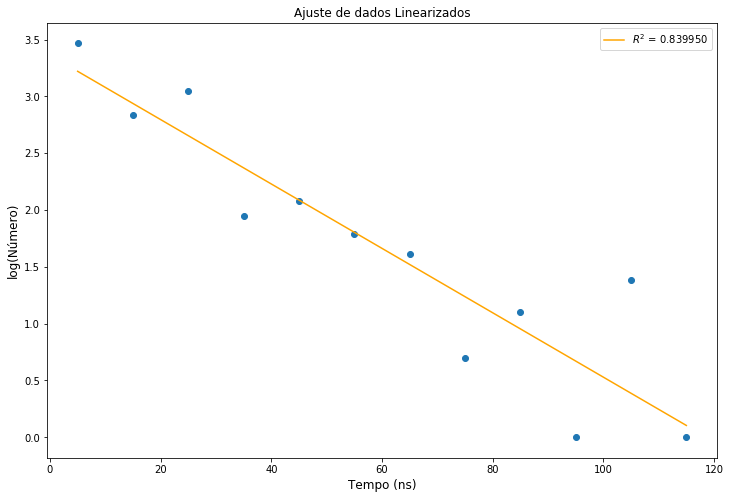

In [59]:
from numpy import log
lOg = log(yd)

print(xd)
S1 = 0
S2 = 0
lOgm = sum(lOg)/N
xdm = sum(xd)/N
for i in range(N):
    S1 += xd[i]*(lOg[i] - lOgm)
    S2 += xd[i]*(xd[i] - xdm)

m = S1/S2
a = lOgm - m*xdm


def ff(x):
    return a+m*xd
f = ff(xd)

s1,s2 = 0,0
for i in range(N):
    s1 += (lOg[i]-f[i])**2
    s2 += (lOg[i] - lOgm)**2 
    
R2 =  1 - (s1/s2)

plt.fig = plt.figure(figsize = (12,8))
plt.title("Ajuste de dados Linearizados",fontsize = 12)
plt.scatter(xd,lOg)
plt.plot(xd,f,c='orange',label = "$R^2$ = %f"%R2)
plt.ylabel("log(Número)",fontsize = 12)
plt.xlabel("Tempo (ns)",fontsize = 12)
plt.legend()

In [60]:
#vamos calcular novamente o valor médio usando integral:
def fff(x):
    return a+m*x

def trapezio (NN,c,d):
    soma=0
    H = (d-c)/N
    
    soma = (fff(c)+fff(d))/2 
    for j in range(1,N):
        soma += fff(c + j*H)
    I = H*soma
    
    print(I)
    return I

valormedio = -trapezio(100,xd[0],xd[1])/(xd[0]-xd[1])
#print(valormedio)

30.790304017999688


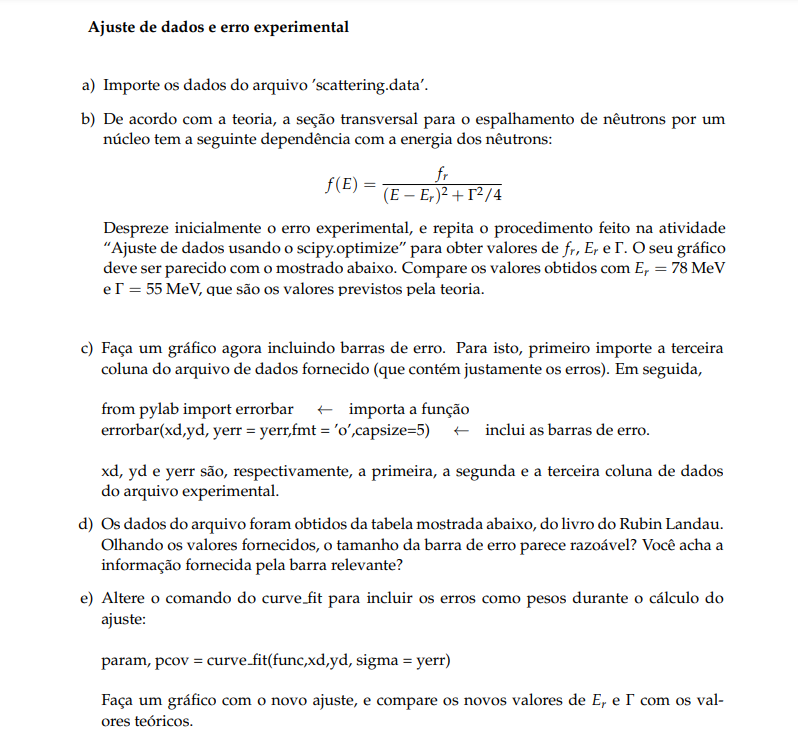

[ 7.74883959e+01  6.67304211e+04 -5.60996269e+01]


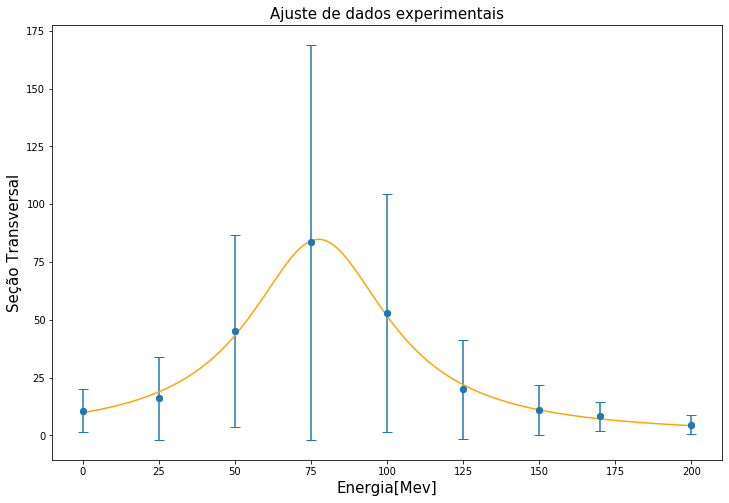

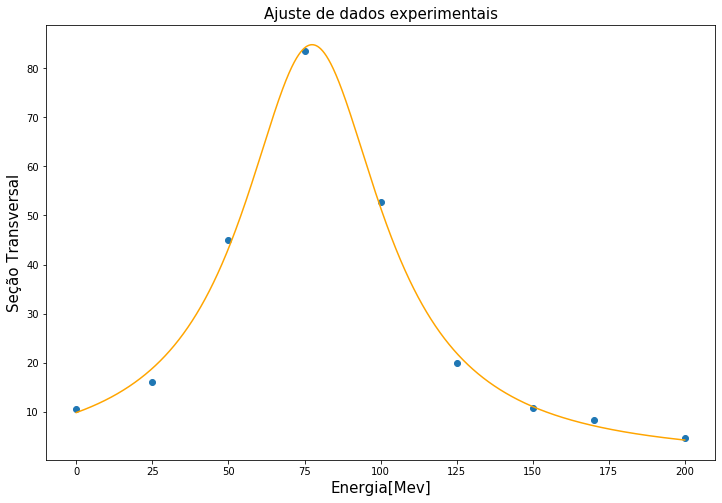

In [61]:
from pylab import errorbar
from numpy import arange
dados2 = loadtxt("scattering.data",float)
Xd = dados2[:,0]
Yd = dados2[:,1]
yerr= dados2[:,2]
N = len(Xd)
def func2(E,Er,fr,gama):
    return fr/((E-Er)**2 + (gama/2)**2)

param,cov = curve_fit(func2,Xd,Yd)
print(param)

EE = arange(Xd[0],Xd[N-1],0.1)
YY = func2(EE,param[0],param[1],param[2])

plt.fig = plt.figure(figsize = (12,8))
plt.title("Ajuste de dados experimentais",fontsize = 15)
plt.scatter(Xd,Yd)
plt.plot(EE,YY,c='orange')
plt.ylabel("Seção Transversal",fontsize = 15)
plt.xlabel("Energia[Mev]",fontsize = 15)
errorbar(Xd,Yd,yerr=yerr,fmt='o',capsize=5)
plt.show()


plt.fig = plt.figure(figsize = (12,8))
plt.title("Ajuste de dados experimentais",fontsize = 15)
plt.scatter(Xd,Yd)
plt.plot(EE,YY,c='orange')
plt.ylabel("Seção Transversal",fontsize = 15)
plt.xlabel("Energia[Mev]",fontsize = 15)
plt.show()



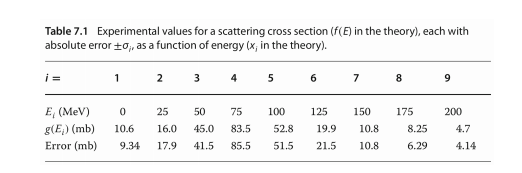

Podemos ver que os erros fornecidos pela tabela variam bastante, de tal forma que algumas medidas são praticamente totalmente não-confiáveis. Sendo assim, não faz sentido fazer uma curva de ajuste de dados que dê igual prioridade a todos os pontos, devemos na verdade priorizar os pontos em que há maior confiabilidade.

[7.79925659e+01 6.94315786e+04 5.81765755e+01]


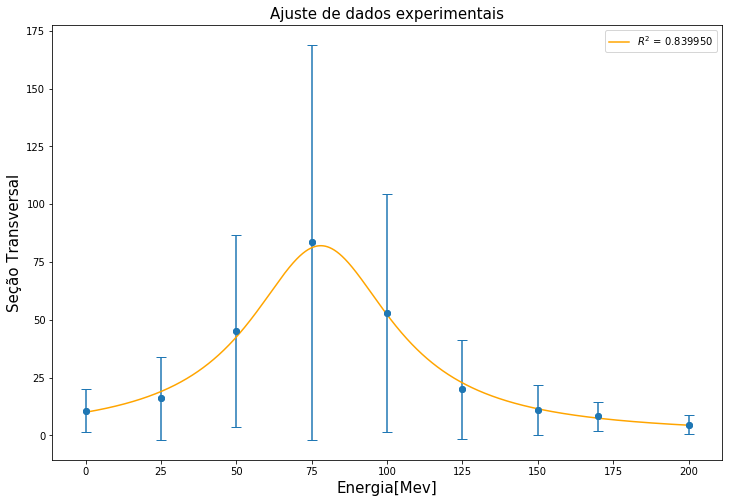

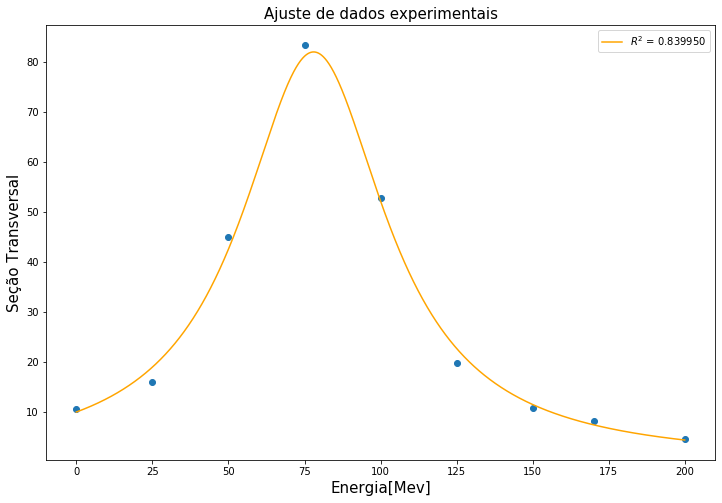

In [62]:

param,cov = curve_fit(func2,Xd,Yd,sigma = yerr)
print(param)

YY = func2(EE,param[0],param[1],param[2])

plt.fig = plt.figure(figsize = (12,8))
plt.title("Ajuste de dados experimentais",fontsize = 15)
errorbar(Xd,Yd,yerr=yerr,fmt='o',capsize=5)
plt.scatter(Xd,Yd)
plt.plot(EE,YY,c='orange',label = "$R^2$ = %f"%R2)
plt.ylabel("Seção Transversal",fontsize = 15)
plt.xlabel("Energia[Mev]",fontsize = 15)
plt.legend()
plt.show()

plt.fig = plt.figure(figsize = (12,8))
plt.title("Ajuste de dados experimentais",fontsize = 15)
plt.scatter(Xd,Yd)
plt.plot(EE,YY,c='orange',label = "$R^2$ = %f"%R2)
plt.ylabel("Seção Transversal",fontsize = 15)
plt.xlabel("Energia[Mev]",fontsize = 15)
plt.legend()
plt.show()






Podemos perceber que a curva prioriza passar pelos pontos nos quais o erro é menor, equanto não se preocupa tanto com pontos cujas barras de erro são maiores.